<a href="https://colab.research.google.com/github/DavidBert/TP_MAPI3_FULL/blob/master/TP2_MAPI3_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification avec Keras

Nous allons dans ce TP résaliser des classifications d'images à l'aide de la librairie Keras.  
Keras est une API de réseaux de neurones de haut niveau. Elle joue le rôle d'interface avec des librairies de deep learnning telles que TensorFlow, CNTK ou Theano. Elle est aujourd'hui totalement intégrée dans les versions actuelles de TensorFlow et permet de prototyper et d'entrainer des réseaux de neurones de façon rapide et facile tout en béneficiant des fonctionnalités offertes par TensorFlow. 
![](https://lesdieuxducode.com/images/blog/titleimages/keras-tensorflow-logo.jpg)

# Multilayer-Perceptron

Pour commencer ce TP nous allons apprendre à utiliser Keras sur le même exemple que le TP précédent: la reconnaissance de chiffres manuscrits.  
Nous allons donc construire un premier réseau "fully-connected" qui prendra en entrée une image et retournera une classification
![](https://img.favpng.com/13/22/3/mnist-database-multilayer-perceptron-artificial-neural-network-statistical-classification-machine-learning-png-favpng-tDc3Ze2RegCutriyH12TfquqE.jpg)

Commençons par importer le dataset.  
Le dataset MNIST de classification de chiffres manuscrits est déjà intégré dans la libraries Keras.

In [20]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Jetons un oeil au format du dataset:

In [21]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


## Question:
Affichez quelques éléments de X_train:

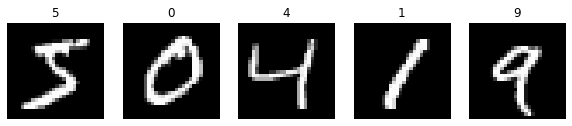

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.axis('off')
  plt.title(y_train[i]);

Avant de pouvoir entrainer notre futur réseau nous devons faire un peu de preprocessing sur nos données en les redimensionant et en les normalisant.  
Actuellement les données sont stockées dans un tenseur de shape ```(6000, 28, 28)``` de type ```uint8``` avec des valeurs comprises entre [0, 255]. Nous devons les transformer en float32 dans un tenseur de taille ```(6000, 28*28)``` avec des valeurs comprises entre [0 et 1]

In [23]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (60000, 784)
X_test shape: (10000, 784)


Les labels attendus par Keras dans des problèmes de classification doivent être forme sous la forme de ***one-hot vectors***.  
Par exemple, le label 2 doit être représenter par le vecteur ```[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]```.  
Nous devons convertir les labels $y$ sous cette forme avant de pouvoir les utiliser sous Keras.  
Keras possède une méthode permettant de faire cette convertion simplement:

In [24]:
print(f'Old version: {y_train[0]}')

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(f'One-hot encoded version: {y_train[0]}')

Old version: 5
One-hot encoded version: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


La façon la plus simple de construire un réseau sous Keras est d'utiliser les models ```Sequential```.  
Il suffit d'instancier un de ces models et d'y ajouter les couches dont on a besoin une par une.

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# Nous rajoutons ici une première couche cachée de 512 neurones avec fonction d'acctivation ReLU
# Seule la première couche à besoin de connaitre la taille de ses inputs
model.add(Dense(512, activation='relu', input_shape=(784,)))
# La dernière couche de notre réseau possède un appel à la fonction softmax.
# Cela permet de produire une distribution de probabilités sur les différentes classes possibles en sortie du réseau
model.add(Dense(num_classes, activation='softmax'))

# la methode summary permet de visualiser rapidement les informations du réseau
# regardez le nombre de paramètres utilisés
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Keras possède aussi des outils permettant de visualiser l'architecture des réseaux

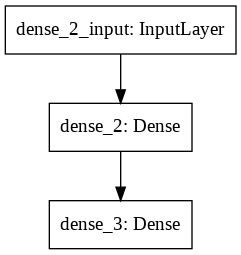

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='mlp_model.png')

Avant de pouvoir entrainer le réseau nous devons configurer son processus d’apprentissage avec ```compile()``` afin de lui fournir la fonction de perte qu'il cherchera à minimiser et l'optimiseur qu'il pourra utiliser pour cela.  
Enfin nous pouvons lui donner des ```metrics``` qui nous permettrons de l'évaluer.

In [27]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Le code suivant permet de lancer un apprentissage de 20 epochs sur de batchs de taille 128 et de stocker les statistiques de l'apprentissage dans un objet ```history```

In [28]:
batch_size = 128
epochs = 20

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2524 - accuracy: 0.9264 - val_loss: 0.1282 - val_accuracy: 0.9612
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1039 - accuracy: 0.9692 - val_loss: 0.0855 - val_accuracy: 0.9734
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0677 - accuracy: 0.9799 - val_loss: 0.0802 - val_accuracy: 0.9749
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0496 - accuracy: 0.9853 - val_loss: 0.0680 - val_accuracy: 0.9796
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0375 - accuracy: 0.9890 - val_loss: 0.0703 - val_accuracy: 0.9790
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0286 - accuracy: 0.9916 - val_loss: 0.0668 - val_accuracy: 0.9806
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0217 - accuracy: 0.9936 - val_loss: 0.0679 - val_accuracy: 0.9812
Epoch 

La méthode ```evaluate``` permet de voir les résulats de l'apprentissage sur le jeu de test

In [29]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10093095153570175
Test accuracy: 0.9828000068664551


Nous pouvons afficher les courbes d'apprentissage grace aux statistiques conservées dans ```history```

In [30]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

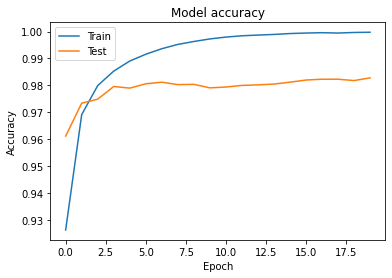

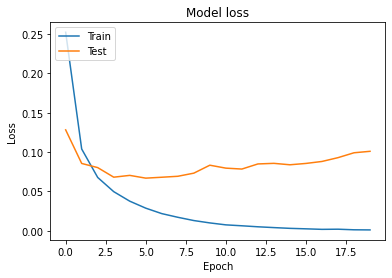

In [31]:
plot_learning_curves(history)

## Question:
Au vu des courbes, nous avons clairement overfité sur nos données d'apprentissage.  
Vous avez vu en cours une méthode simple permettant de réduire le sur-apprentissage il s'agit du [dropout](http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf). Cette methode est très simple à mettre en oeuvre dans Keras.   
Construisez un nouveau model ayant la même architecture mais incluant du dropout `model.add(Dopout(rate))` entre les deux couches ```Dense``` et affichez les statistques d'apprentissage.  
Que constatez vous?

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3182 - accuracy: 0.9066 - val_loss: 0.1624 - val_accuracy: 0.9517
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1535 - accuracy: 0.9547 - val_loss: 0.1057 - val_accuracy: 0.9685
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1177 - accuracy: 0

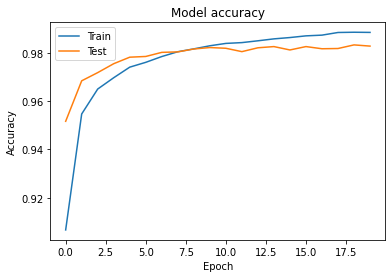

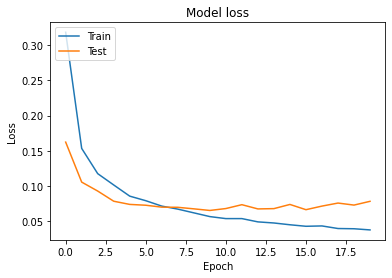

In [32]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

plot_learning_curves(history)

Vous pouvez facilement enregistrer les poids de votre model:

In [33]:
import os

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'MNIST_MLP_Keras.h5'

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/MNIST_MLP_Keras.h5 


# Convolutional Neural Networks

![](https://miro.medium.com/max/395/1*1VJDP6qDY9-ExTuQVEOlVg.gif)

Nous allons maintenant implémenter les réseaux convolutionels que vous avez vu en cours.  
Ces réseaux sont capables de travailler directement avec des images en entrées.  
Important cependant, dans Keras les réseaux convolutionels prennent en entrées des tenseurs de la forme suivante ```(image_height, image_width, image_channels)``` (sans inclure la dimension du batch).  
Une image "classique" en couleur possède 3 canaux ou "channels" représentant le rouge, le vert et le bleu.  
Les images MNIST étant en noir et blanc, elles ne possèdent qu'un seul canal. Nous allons donc redimensionner nos images pour qu'elles aient la taille suivante: ```(28, 28, 1)```

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


Nous travaillons donc directement avec des images  28x28x1.  
Voici un exemple simple de réseau convolutionnel sous Keras.  
Ce réseau est constitué de plusieurs couches convolutionnelles `Conv2D`.  
Chacune de ces couches possède des arguments, entre autres:
- `filters`: le nombre de filtres en sortie de la couche de convolution
- `kernel`: la taille des filtres de convolution
- `activation`: la fonction d'activation appliquée sur la couche
- `input_shape` la taille des entrées de la couche. Cet argument est uniquement nécéssaire sur la première couche les suivantes calculeront automatiquement la taille de leurs entrées.  
La documentation complète de ces couches peut être trouvée [ici](https://keras.io/layers/convolutional/).  
Le modèle possède aussi  

*   des couches `MaxPooling2D` réalisant les oppération de pooling
*   une couche `Flatten` permettant d'applatir les matrices en sortie sous forme de vecteurs
*   des couches `Denses` que nous avons déjà utilisées.


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
num_classes = 10

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

## Question
Comparez le nombre de paramètres du réseau avec le précédent

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

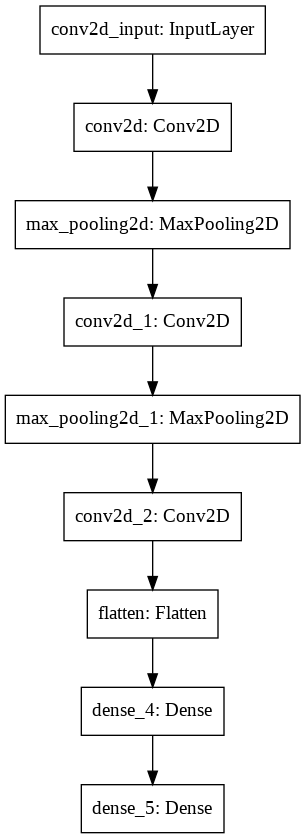

In [ ]:
plot_model(model, to_file='cnn_model.png')

## Question:
Entrainez le réseaux sur X_train et affichez les courbes d'apprentissage

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
batch_size = 128
epochs = 12

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/12
469/469 [==============================] - 7s 5ms/step - loss: 0.5206 - accuracy: 0.8268 - val_loss: 0.0895 - val_accuracy: 0.9701
Epoch 2/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0573 - accuracy: 0.9818 - val_loss: 0.0411 - val_accuracy: 0.9865
Epoch 3/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.0302 - val_accuracy: 0.9901
Epoch 4/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0272 - accuracy: 0.9912 - val_loss: 0.0276 - val_accuracy: 0.9916
Epoch 5/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0197 - accuracy: 0.9943 - val_loss: 0.0239 - val_accuracy: 0.9925
Epoch 6/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0175 - accuracy: 0.9950 - val_loss: 0.0266 - val_accuracy: 0.9910
Epoch 7/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0347 - val_accuracy: 0.9906
Epoch 

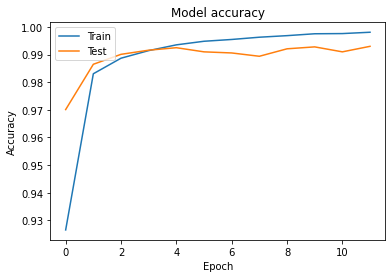

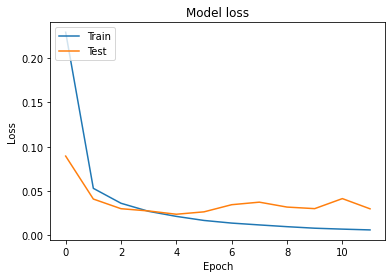

In [ ]:
plot_learning_curves(history)

## Question:
Affichez les scores sur X_test

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.030043665319681168
Test accuracy: 0.9929999709129333


# CIFAR

Nous allons cette fois-ci utiliser un CNN pour classifier des images en couleur.  
Nous allons utiliser le dataset CIFAR-10 constitué de 60 000 images, en couleur, de résolution 32*32.  
Le dataset est séparé en 2 parties, les données d’apprentissage (50 000 images) et les données de test (10 000 images).  
La tâche consiste à classifier les images du dataset parmis 10 classes.

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  X_train.shape
num_classes = len(np.unique(y_train))
print(X_train.shape)

170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)


Voici un exemple d'image de chaque classe

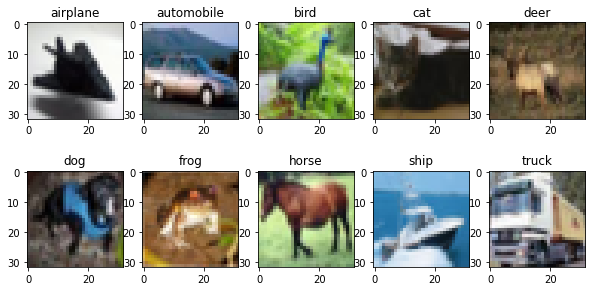

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(10,5))
for i in range(num_classes):
    plt.subplot(2, 5, 1 + i)
    #get first exmple of ith class
    idx = np.where(y_train[:]==i)[0][0]
    image = X_train[idx,::]
    plt.imshow(image)
    plt.title(class_names[i])

## Question:
Similarement à ce ce que l'on a fait précédement avec le dataset MNIST, implémentez un resau CNN capable de catégoriser les images de CIFAR10.  
N'oubliez pas la préprocessing des données et des labels.  
Voici un exemple d'architecture mais n'hésitez pas à tester les votres.

* Conv2D: filter: 32, Kernel(3,3), padding='same', activation:relu  
* Conv2D: filter: 32, Kernel(3,3), padding='same', activation:relu
* MaxPooling2D: (2,2)
* Conv2D: filter: 64, Kernel(3,3), padding='same', activation:relu  
* Conv2D: filter: 64, Kernel(3,3), padding='same', activation:relu
* MaxPooling2D: (2,2)
* Flatten
* Dense 512 activation:ReLU
* Dense num_classes activation:softmax




In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes), activation='softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)         

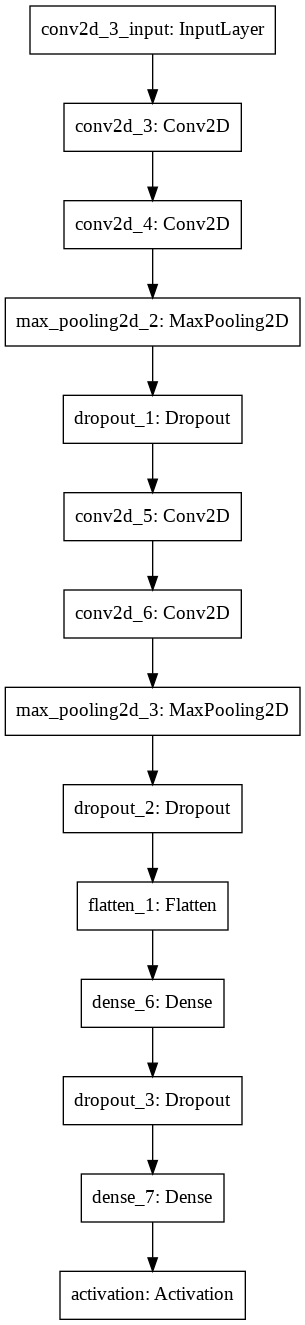

In [ ]:
plot_model(model, to_file='cnn_model_cifar10.png')

## Questions
Entrainez votre réseau et affichez vos courbes d'apprentissage

In [ ]:
batch_size = 64
num_classes = 10
epochs = 20

history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/20
782/782 [==============================] - 5s 6ms/step - loss: 2.1053 - accuracy: 0.2193 - val_loss: 1.7120 - val_accuracy: 0.3883
Epoch 2/20
782/782 [==============================] - 4s 6ms/step - loss: 1.6658 - accuracy: 0.3956 - val_loss: 1.5041 - val_accuracy: 0.4565
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 1.5167 - accuracy: 0.4546 - val_loss: 1.4150 - val_accuracy: 0.4909
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 1.4065 - accuracy: 0.4939 - val_loss: 1.3886 - val_accuracy: 0.5067
Epoch 5/20
782/782 [==============================] - 4s 6ms/step - loss: 1.3302 - accuracy: 0.5251 - val_loss: 1.2176 - val_accuracy: 0.5705
Epoch 6/20
782/782 [==============================] - 4s 6ms/step - loss: 1.2555 - accuracy: 0.5498 - val_loss: 1.2185 - val_accuracy: 0.5716
Epoch 7/20
782/782 [==============================] - 4s 6ms/step - loss: 1.2060 - accuracy: 0.5759 - val_loss: 1.1627 - val_accuracy: 0.5939
Epoch 

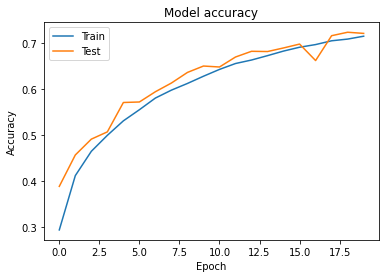

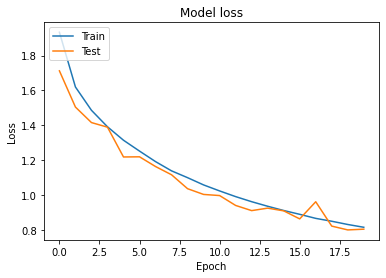

In [ ]:
plot_learning_curves(history)

# Tiny Imagenet

Nous allons maintenant nous entrainer sur des images de plus grandes résolutions.  
Pour cela nous utiliserons un sous-échantillon du célèbre dataset [Imagenet](http://www.image-net.org/challenges/LSVRC/2014/).  
Commençons par télécharger les données

In [34]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz
!unzip imagenette2.tgz

--2021-07-24 20:39:45--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.97.125
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.97.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1557161267 (1.5G) [application/x-tar]
Saving to: ‘imagenette2.tgz’

imagenette2.tgz     100%[===================>]   1.45G  15.8MB/s    in 99s     

2021-07-24 20:41:25 (15.0 MB/s) - ‘imagenette2.tgz’ saved [1557161267/1557161267]

Archive:  imagenette2.tgz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of imagenette2.tgz or
        imagenette2.tgz.zip, and cannot find imagenette2.tgz.ZIP, period.


In [35]:
!tar zxvf imagenette2.tgz

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
imagenette2/train/n03888257/n03888257_16077.JPEG
imagenette2/train/n03888257/n03888257_23339.JPEG
imagenette2/train/n03888257/n03888257_44204.JPEG
imagenette2/train/n03888257/n03888257_61633.JPEG
imagenette2/train/n03888257/n03888257_15067.JPEG
imagenette2/train/n03888257/n03888257_75365.JPEG
imagenette2/train/n03888257/n03888257_63966.JPEG
imagenette2/train/n03888257/n03888257_3927.JPEG
imagenette2/train/n03888257/n03888257_20684.JPEG
imagenette2/train/n03888257/ILSVRC2012_val_00047778.JPEG
imagenette2/train/n03888257/n03888257_14016.JPEG
imagenette2/train/n03888257/n03888257_37776.JPEG
imagenette2/train/n03888257/ILSVRC2012_val_00041706.JPEG
imagenette2/train/n03888257/n03888257_17513.JPEG
imagenette2/train/n03888257/n03888257_17143.JPEG
imagenette2/train/n03888257/n03888257_6738.JPEG
imagenette2/train/n03888257/n03888257_4355.JPEG
imagenette2/train/n03888257/ILSVRC2012_val_00030583.JPEG
imagenette2/train/n

Afin de ne pas charger les données en RAM le code suivant utilise un générateur permettant de charger les images dans la RAM uniquement lorsque l'on en a besoin.  
Les images sont stockées dans le dossier imagenette2, lui même séparé en deux dossiers train et val.  
Chacun d'eux contient 10 sous dossiers: un pour chaque classe.  
Il s'agit de l'arborescence attendue par les generateurs en Keras.  
Deux générateurs sont définis: un pour l'apprentissage un autre pour la validation.  
Le préprocessing des images est géré par les générateurs, regardez attentivement comment dans le code.

In [36]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'imagenette2'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


Voici un exemple d'image de chaque classe

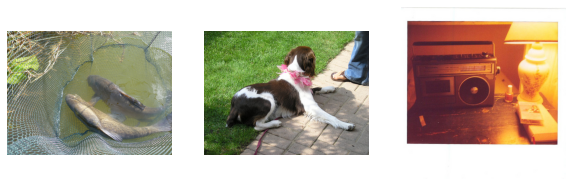

In [37]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
img = load_img(os.path.join(train_dir, 'n01440764/ILSVRC2012_val_00000293.JPEG'))
plt.imshow(img)
plt.axis('off');
plt.subplot(1,3,2)
img = load_img(os.path.join(train_dir, 'n02102040/n02102040_2474.JPEG'))
plt.imshow(img)
plt.axis('off');
plt.subplot(1,3,3)
img = load_img(os.path.join(train_dir, 'n02979186/n02979186_14378.JPEG'))
plt.imshow(img)
plt.axis('off');

## Question:
Essayez d'apprendre sur ce jeu de données avec une architecture similaire à votre ancien modèle.  
Pensez à modifier la taille des inputs de la première couche et le nombre de classes en sortie.  
Voici un exemple de code permettant de fitter votre modèle depuis un générateur:  
```python
history = model.fit_generator(
      train_generator,
      steps_per_epoch=128,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)
```

In [ ]:
num_classes = 10

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)       

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=128,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
128/128 [==============================] - 29s 221ms/step - loss: 2.5097 - accuracy: 0.2082 - val_loss: 1.8268 - val_accuracy: 0.4087
Epoch 2/20
128/128 [==============================] - 28s 218ms/step - loss: 1.7638 - accuracy: 0.3993 - val_loss: 1.6312 - val_accuracy: 0.4781
Epoch 3/20
128/128 [==============================] - 29s 223ms/step - loss: 1.5822 - accuracy: 0.4791 - val_loss: 1.5194 - val_accuracy: 0.5306
Epoch 4/20
128/128 [==============================] - 28s 223ms/step - loss: 1.4354 - accuracy: 0.5288 - val_loss: 1.3724 - val_accuracy: 0.5769
Epoch 5/20
128/128 [==============================] - 29s 226ms/step - loss: 1.3488 - accuracy: 0.5553 - val_loss: 1.3309 - val_accuracy: 0.5681
Epoch 6/20
128/128 [==============================] - 28s 219ms/step - loss: 1.2685 - accuracy: 0.5898 - val_loss: 1.3281 - val_accuracy: 0.5706
Epoch 7/20
128/128 [==============================] - 28s 222ms/step - loss: 1.1999 - accuracy: 0.6031 - val_loss: 1.2514 - val_ac

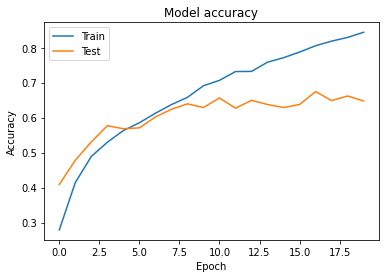

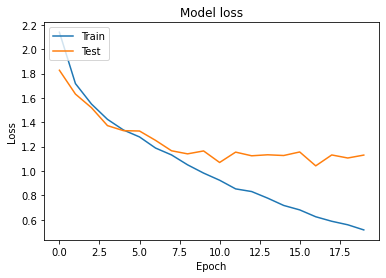

In [ ]:
plot_learning_curves(history)

## Data Augmentation

Il est fort probable que vous ayez overfitté avec le modèle précédent.  
Nous allons voir dans cette section une des techniques souvent utilisées en computer vision pour améliorer la qualité des modèles et diminuer l'overfitting: la data-augmentation.   
L'idée est très simple: on applique des perturbations (rotations, zooms, ...) aux images déjà présentes dans le dataset afin de constituer de nouveaux échantillons d'apprentissage et ainsi robustifier notre modèle.  
Le code suivant définit un générateur qui génèrera à la volée les images perturbées.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmenting_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40, # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2, # randomly shift images horizontally (fraction of total height)
    height_shift_range=0.2,# randomly shift images vertically (fraction of total height)
    shear_range=0.2,# set range for random shear
    zoom_range=0.2,# set range for random zoom
    horizontal_flip=True,# randomly flip images
    fill_mode='nearest' # set mode for filling points outside the input boundaries
)

Voici un exemple de data-augmentation de notre générateur

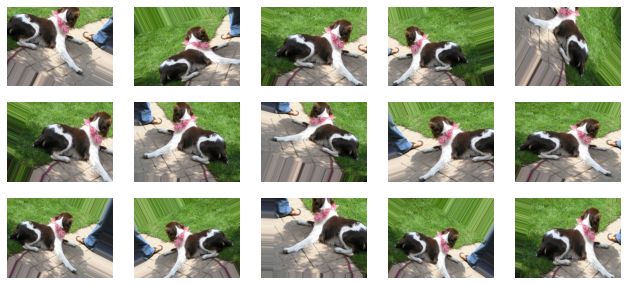

In [ ]:
img = load_img(os.path.join(train_dir, 'n02102040/n02102040_2474.JPEG'))
X =np.array(img)
plt.figure(figsize=(11, 5))
flow = augmenting_datagen.flow(X[np.newaxis, :, :, :])
for i, X_augmented in zip(range(15), flow):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_augmented[0])
    plt.axis('off')

## Question:
Lancez un apprentissage avec le générateur faisant de la data-augmentation sur un modèle possédant la même architecture que le modèle précédent et affichez les courbes d'apprentissage.  
Que remarquez vous?

### Attention la data-augmentation ralentit la vitesse d'apprentissage sour Keras.  
###Traitez cette question en toute fin de scéance pour ne pas ralentir votre progression dans le notebook

Found 9469 images belonging to 10 classes.
Epoch 1/20
296/296 [==============================] - 80s 270ms/step - loss: 2.1017 - acc: 0.2629 - val_loss: 1.8710 - val_acc: 0.3982
Epoch 2/20
296/296 [==============================] - 76s 258ms/step - loss: 1.8191 - acc: 0.3701 - val_loss: 1.6788 - val_acc: 0.4550
Epoch 3/20
296/296 [==============================] - 77s 260ms/step - loss: 1.7052 - acc: 0.4185 - val_loss: 1.5696 - val_acc: 0.5080
Epoch 4/20
296/296 [==============================] - 77s 260ms/step - loss: 1.6193 - acc: 0.4512 - val_loss: 1.4655 - val_acc: 0.5241
Epoch 5/20
296/296 [==============================] - 77s 261ms/step - loss: 1.5494 - acc: 0.4799 - val_loss: 1.3989 - val_acc: 0.5518
Epoch 6/20
296/296 [==============================] - 77s 261ms/step - loss: 1.5233 - acc: 0.4851 - val_loss: 1.4385 - val_acc: 0.5279
Epoch 7/20
296/296 [==============================] - 76s 256ms/step - loss: 1.4765 - acc: 0.5082 - val_loss: 1.3679 - val_acc: 0.5636
Epoch 8/20
2

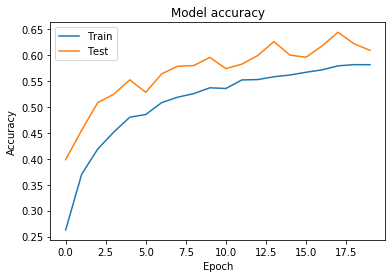

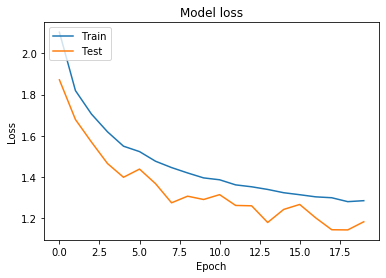

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

train_generator = augmenting_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

history = model.fit_generator(train_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    workers=6)

plot_learning_curves(history)

# Using a pre-trained convnet

Le réseau ne semble pas pouvoir apprendre rapidement sur le dataset.  
Nous allons, cette fois-ci, utiliser une stratégie différente:
nous allons récupérer un réseau pré-entrainé (en l'occurence sur Imagenet), couper les dérnières couches afin de récupérer les features qu'il utilise pour effectuer ses décisions.   Nous utiliserons alors ces features pour entrainer un nouveau classifieur.  
Le code suivant récupère un réseau entrainé sur Imagenet et enlève les dernières couches du réseau.

In [38]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 1s 0us/step


Il s'agit d'un modèle VGG16, voici son architecture:
![](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)
Nous récupérons dans notre cas les features en sortie de la dernière couche de pooling.  
Nos feature sont donc de dimension $7*7*512$

In [39]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
test_features, test_labels = extract_features(validation_dir, 1000)


Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


## t-SNE

Il peut parfois être utile de visualiser les features afin d'avoir une indication de leur qualité.  
Nous allons utiliser une technique de visualisation appelée t-SNE et dont voici la définition (source [Wikipedia](https://fr.wikipedia.org/wiki/Algorithme_t-SNE)):  

*L'algorithme t-SNE (t-distributed stochastic neighbor embedding) est une technique de réduction de dimension pour la visualisation de données développée par Geoffrey Hinton et Laurens van der Maaten. Il s'agit d'une méthode non-linéaire permettant de représenter un ensemble de points d'un espace à grande dimension dans un espace de deux ou trois dimensions, les données peuvent ensuite être visualisées avec un nuage de points. L'algorithme t-SNE tente de trouver une configuration optimale selon un critère de théorie de l'information pour respecter les proximités entre points : deux points qui sont proches (resp. éloignés) dans l'espace d'origine devront être proches (resp. éloignés) dans l'espace de faible dimension.*

*L'algorithme t-SNE se base sur une interprétation probabiliste des proximités. Une distribution de probabilité est définie sur les paires de points de l'espace d'origine de telle sorte que des points proches l'un de l'autre ont une forte probabilité d'être choisis tandis que des points éloignés ont une faible probabilité d'être sélectionnés. Une distribution de probabilité est également définie de la même manière pour l'espace de visualisation. L'algorithme t-SNE consiste à faire concorder les deux densités de probabilité, en minimisant la divergence de Kullback-Leibler entre les deux distributions par rapport à l'emplacement des points sur la carte.*

Parmis les bonne pratiques il est recommandé de procéder à une PCA en amont afin de ne pas travailler dans des espaces trop grands:  
*It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples. For more tips see Laurens van der Maaten’s FAQ.* (source [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

## Question
Visulalisez vos features à l'aide des methodes [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) et [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) de scikit-learn.  
Vous reduirez dans un premier temps la dimension de vos features grace à une PCA puis utiliserez la t-SNE.

In [40]:
train_features = np.reshape(train_features, (2000, 7 * 7 * 512))
test_features = np.reshape(test_features, (1000, 7 * 7 * 512))

In [41]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train_features)
X_tsne = TSNE(2, perplexity=50).fit_transform(X_pca)

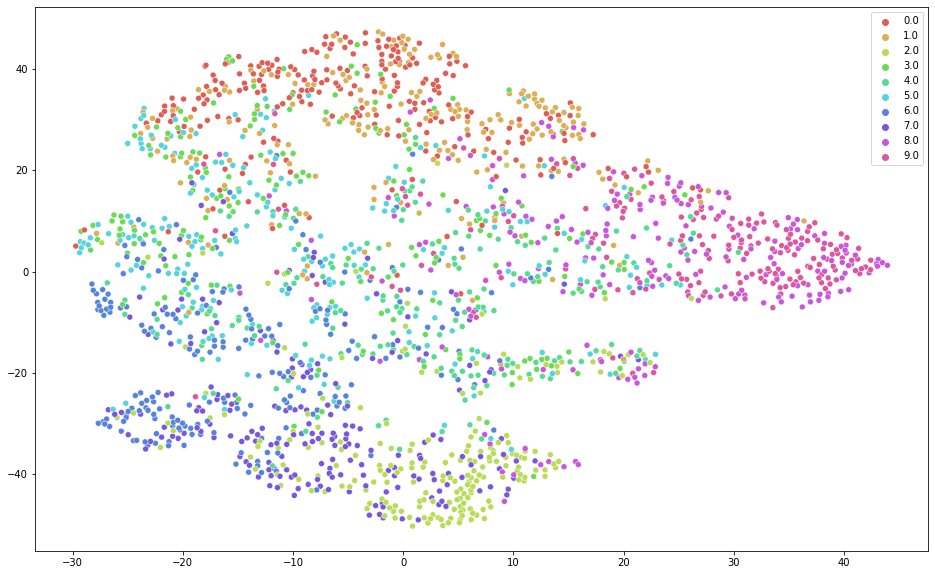

In [42]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    hue=train_labels,
    palette=sns.color_palette("hls", 10),
    legend="full",
)

## Random Forest

Nous pouvons utiliser n'importe quel classifieur pour classer nos images à partir de leur projection dans l'espace des features.
## Question  
Utilisez un [random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) de scikit-learn pour classifier à partir des features et mesurez votre précision.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(test_features)
accuracy = accuracy_score(test_labels, y_pred)
print(f'accuracy:{accuracy}')

accuracy:0.795


## New classifier

Entrainez un petit réseau (une couche cachée de 256 neurones et une couche de dropout) à partir des features et mesurez sa performance.

In [43]:
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [44]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=7 * 7 * 512))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(optimizer=RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_features, train_labels,
                    epochs=20,
                    batch_size=20,
                    validation_data=(test_features, test_labels))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
100/100 [==============================] - 4s 39ms/step - loss: 1.7908 - accuracy: 0.4125 - val_loss: 1.1706 - val_accuracy: 0.7200
Epoch 2/20
100/100 [==============================] - 4s 36ms/step - loss: 1.0375 - accuracy: 0.6875 - val_loss: 0.8073 - val_accuracy: 0.7820
Epoch 3/20
100/100 [==============================] - 4s 36ms/step - loss: 0.7397 - accuracy: 0.7735 - val_loss: 0.6804 - val_accuracy: 0.8020
Epoch 4/20
100/100 [==============================] - 4s 36ms/step - loss: 0.5706 - accuracy: 0.8385 - val_loss: 0.5819 - val_accuracy: 0.8390
Epoch 5/20
100/100 [==============================] - 4s 35ms/step - loss: 0.4720 - accuracy: 0.8765 - val_loss: 0.5277 - val_accuracy: 0.8490
Epoch 6/20
100/100 [==============================] - 4s 35ms/step - loss: 0.3719 - accuracy: 0.8960 - val_loss: 0.4945 - val_accuracy: 0.8580
Epoch 7/20
100/100 [==============================] - 4s 35ms/step - loss: 0.3120 - accuracy: 0.9175 - val_loss: 0.4721 - val_accuracy: 0.8530

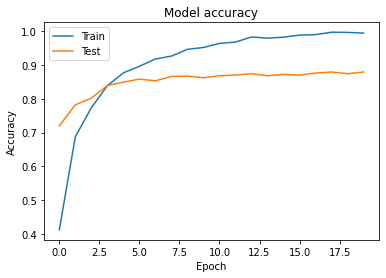

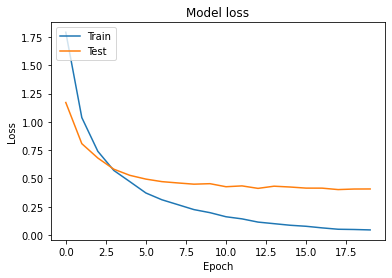

In [45]:
plot_learning_curves(history)

Plutôt que de créer deux modèles: un pour le calcul des features déjà entrainé et un autre pour la prise de décision, nous pouvons définir un unique modèle composé du premier et auquel on raccroche une derniere couche de classification.

In [48]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu', name='features'))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
features (Dense)             (None, 256)               6422784   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 21,140,042
Trainable params: 21,140,042
Non-trainable params: 0
_________________________________________________________________


Nous allons geler les poids des couches calculant les features afin de ne pas tout ré-apprendre et d'accélérer l'entrainement.

In [49]:
print('Voici le nombre de couches "trainable":', len(model.trainable_weights))

Voici le nombre de couches "trainable": 30


In [50]:
conv_base.trainable = False

In [51]:
print('Voici le nombre de couches "trainable" après avoir gelé le model de base:', len(model.trainable_weights))

Voici le nombre de couches "trainable" après avoir gelé le model de base: 4


## Question:
Entrainez le modèle et affichez sa courbe d'apprentissage

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=2e-5),
              metrics=['accuracy'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=128,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
128/128 [==============================] - 29s 221ms/step - loss: 0.1693 - accuracy: 0.7704 - val_loss: 0.1258 - val_accuracy: 0.8231
Epoch 2/20
128/128 [==============================] - 30s 231ms/step - loss: 0.1070 - accuracy: 0.8555 - val_loss: 0.1043 - val_accuracy: 0.8394
Epoch 3/20
128/128 [==============================] - 29s 223ms/step - loss: 0.0895 - accuracy: 0.8746 - val_loss: 0.0885 - val_accuracy: 0.8756
Epoch 4/20
128/128 [==============================] - 30s 234ms/step - loss: 0.0774 - accuracy: 0.8988 - val_loss: 0.0849 - val_accuracy: 0.8712
Epoch 5/20
128/128 [==============================] - 29s 229ms/step - loss: 0.0676 - accuracy: 0.9057 - val_loss: 0.0789 - val_accuracy: 0.8781
Epoch 6/20
128/128 [==============================] - 29s 224ms/step - loss: 0.0558 - accuracy: 0.9389 - val_loss: 0.0732 - val_accuracy: 0.8850
Epoch 7/20
128/128 [==============================] - 29s 226ms/step - loss: 0.0560 - accuracy: 0.9314 - val_loss: 0.0691 - val_ac

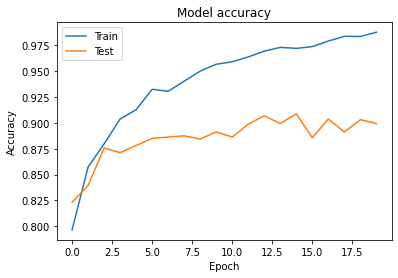

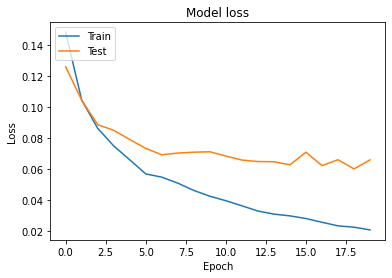

In [ ]:
plot_learning_curves(history)

## Fine Tunning
Il est possible d'ameliorer encore un peu la qualité des prédictions en effecuant ce que l'on appelle du ***fine tunning***.  
Le principe est très simple, nous allons dé-geler les dernières couches de notre modèle de base et les entrainer conjointement avec les couches que nous lui avons ajoutées. L'idée ici est d'ajuster un peu (on utilise un learning rate plus petit que précédement) les représentations abstraites des dernières couches calculant les features pour les rendre plus pertinentes pour notre problème.  
Dans notre cas nos features ont été apprises sur le même dataset Imagenet. Elles sont donc déjà suffisement pertinentes pour la tâche que l'on cherche à résoudre et l'on ne devrait pas forcément observer d'améliorations.  
Voici cependant un exemple de code permettant de réaliser du fine-tuning:

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
conv_base.trainable = False

for layer in conv_base.layers:
    if layer.name in ['block5_conv1', 'block5_conv2', 'block5_conv3'] :
        layer.trainable = True

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=128,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
128/128 [==============================] - 30s 227ms/step - loss: 0.0195 - acc: 0.9873 - val_loss: 0.0608 - val_acc: 0.9006
Epoch 2/20
128/128 [==============================] - 29s 224ms/step - loss: 0.0185 - acc: 0.9909 - val_loss: 0.0604 - val_acc: 0.9031
Epoch 3/20
128/128 [==============================] - 28s 221ms/step - loss: 0.0162 - acc: 0.9907 - val_loss: 0.0633 - val_acc: 0.9025
Epoch 4/20
128/128 [==============================] - 29s 224ms/step - loss: 0.0170 - acc: 0.9907 - val_loss: 0.0576 - val_acc: 0.9100
Epoch 5/20
128/128 [==============================] - 29s 225ms/step - loss: 0.0169 - acc: 0.9906 - val_loss: 0.0610 - val_acc: 0.9050
Epoch 6/20
128/128 [==============================] - 29s 224ms/step - loss: 0.0148 - acc: 0.9926 - val_loss: 0.0579 - val_acc: 0.9100
Epoch 7/20
128/128 [==============================] - 29s 228ms/step - loss: 0.0145 - acc: 0.9936 - val_loss: 0.0624 - val_acc: 0.9106
Epoch 8/20
128/128 [==============================] - 2

## Question:
Nous sommes ici en présence d'un overfitting essayez de le réduire.
Vous pouvez essayer cette fois-ci une autre méthode permettant de le reduire: la [batch normalisation](https://keras.io/layers/normalization/)
